Optimize the portfolio.
=====



In [1]:
from mypo import Runner, Loader
from mypo.rebalancer import MonthlyRebalancer
from mypo.optimizer import MinimumVarianceOptimizer, SharpRatioOptimizer
from mypo.indicator import yearly_total_return, max_drawdown, max_drawdown_span
import numpy as np

In [2]:
loader = Loader()

In [3]:
loader.get('VOO', 0.0003)
loader.get('EDV', 0.0007)

In [4]:
market = loader.get_market()

100%|██████████| 2449/2449 [00:07<00:00, 316.14it/s]


[0.39969727 0.60030273]
2449
1.1244309421123664
0.8687862283219002
229


<AxesSubplot:>

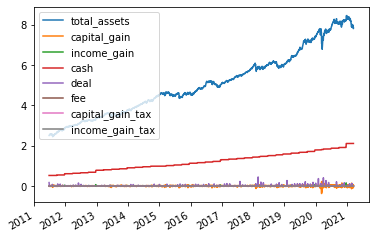

In [5]:
optimizer = MinimumVarianceOptimizer()
runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()

100%|██████████| 2449/2449 [00:07<00:00, 317.97it/s]


[0.29286514 0.70713486]
2449
1.1192116291717584
0.8718641364521077
232


<AxesSubplot:>

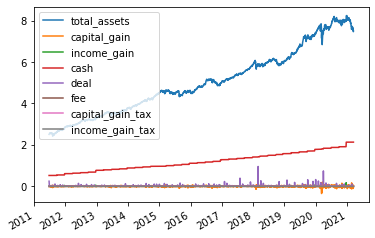

In [6]:
optimizer = MinimumVarianceOptimizer(with_semi_covariance=True)

runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()

 46%|████▌     | 1121/2449 [00:03<00:04, 319.02it/s]/app/mypo/runner.py:108: RuntimeWarning: divide by zero encountered in true_divide
  self._average_assets_prices = (
/app/mypo/runner.py:109: RuntimeWarning: invalid value encountered in multiply
  self._average_assets_prices * previous_assets + diff * trading_prices
 47%|████▋     | 1154/2449 [00:03<00:04, 320.43it/s]/app/mypo/runner.py:108: RuntimeWarning: divide by zero encountered in true_divide
  self._average_assets_prices = (
/app/mypo/runner.py:109: RuntimeWarning: invalid value encountered in multiply
  self._average_assets_prices * previous_assets + diff * trading_prices
100%|██████████| 2449/2449 [00:07<00:00, 310.99it/s]


[0.50207728 0.49792272]
2449
1.109016673376836
0.8658416404092867
318


<AxesSubplot:>

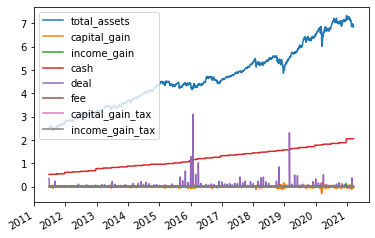

In [7]:
optimizer = SharpRatioOptimizer()

runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()